In [1]:
import data_api as api

In [2]:
data = api.get_data(channels=[
                    'SINSB02-RIQM-DCP10:FOR-PHASE-AVG', 
                    'SINDI01-RIQM-DCP10:FOR-PHASE-AVG', 
                    'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
                  ], 
                  start="2016-07-29 14:01", end="2016-07-29 14:02")


[INFO] indexing will be done on globalDate
[DEBUG] Starting new HTTPS connection (1): data-api.psi.ch
[DEBUG] https://data-api.psi.ch:443 "POST //sf/query HTTP/1.1" 200 None


In [3]:
# Plotting with plotly - interactive

# Import Plotly Offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)

In [4]:
# Correlation Plot
import plotly.graph_objs as go
trace = go.Scatter(
    x = data[data.columns[0]],
    y = data[data.columns[2]],
    mode='markers')

iplot([trace])

In [5]:
# Plot Rolling-Mean
rolling_mean = data.rolling(window=120).mean()

import plotly.graph_objs as go
trace1 = go.Scatter(
    y = data[data.columns[0]])
trace2 = go.Scatter(
    y = rolling_mean[data.columns[0]])

iplot([trace1, trace2])

In [6]:
# Plotting with matplotlib
%matplotlib nbagg
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


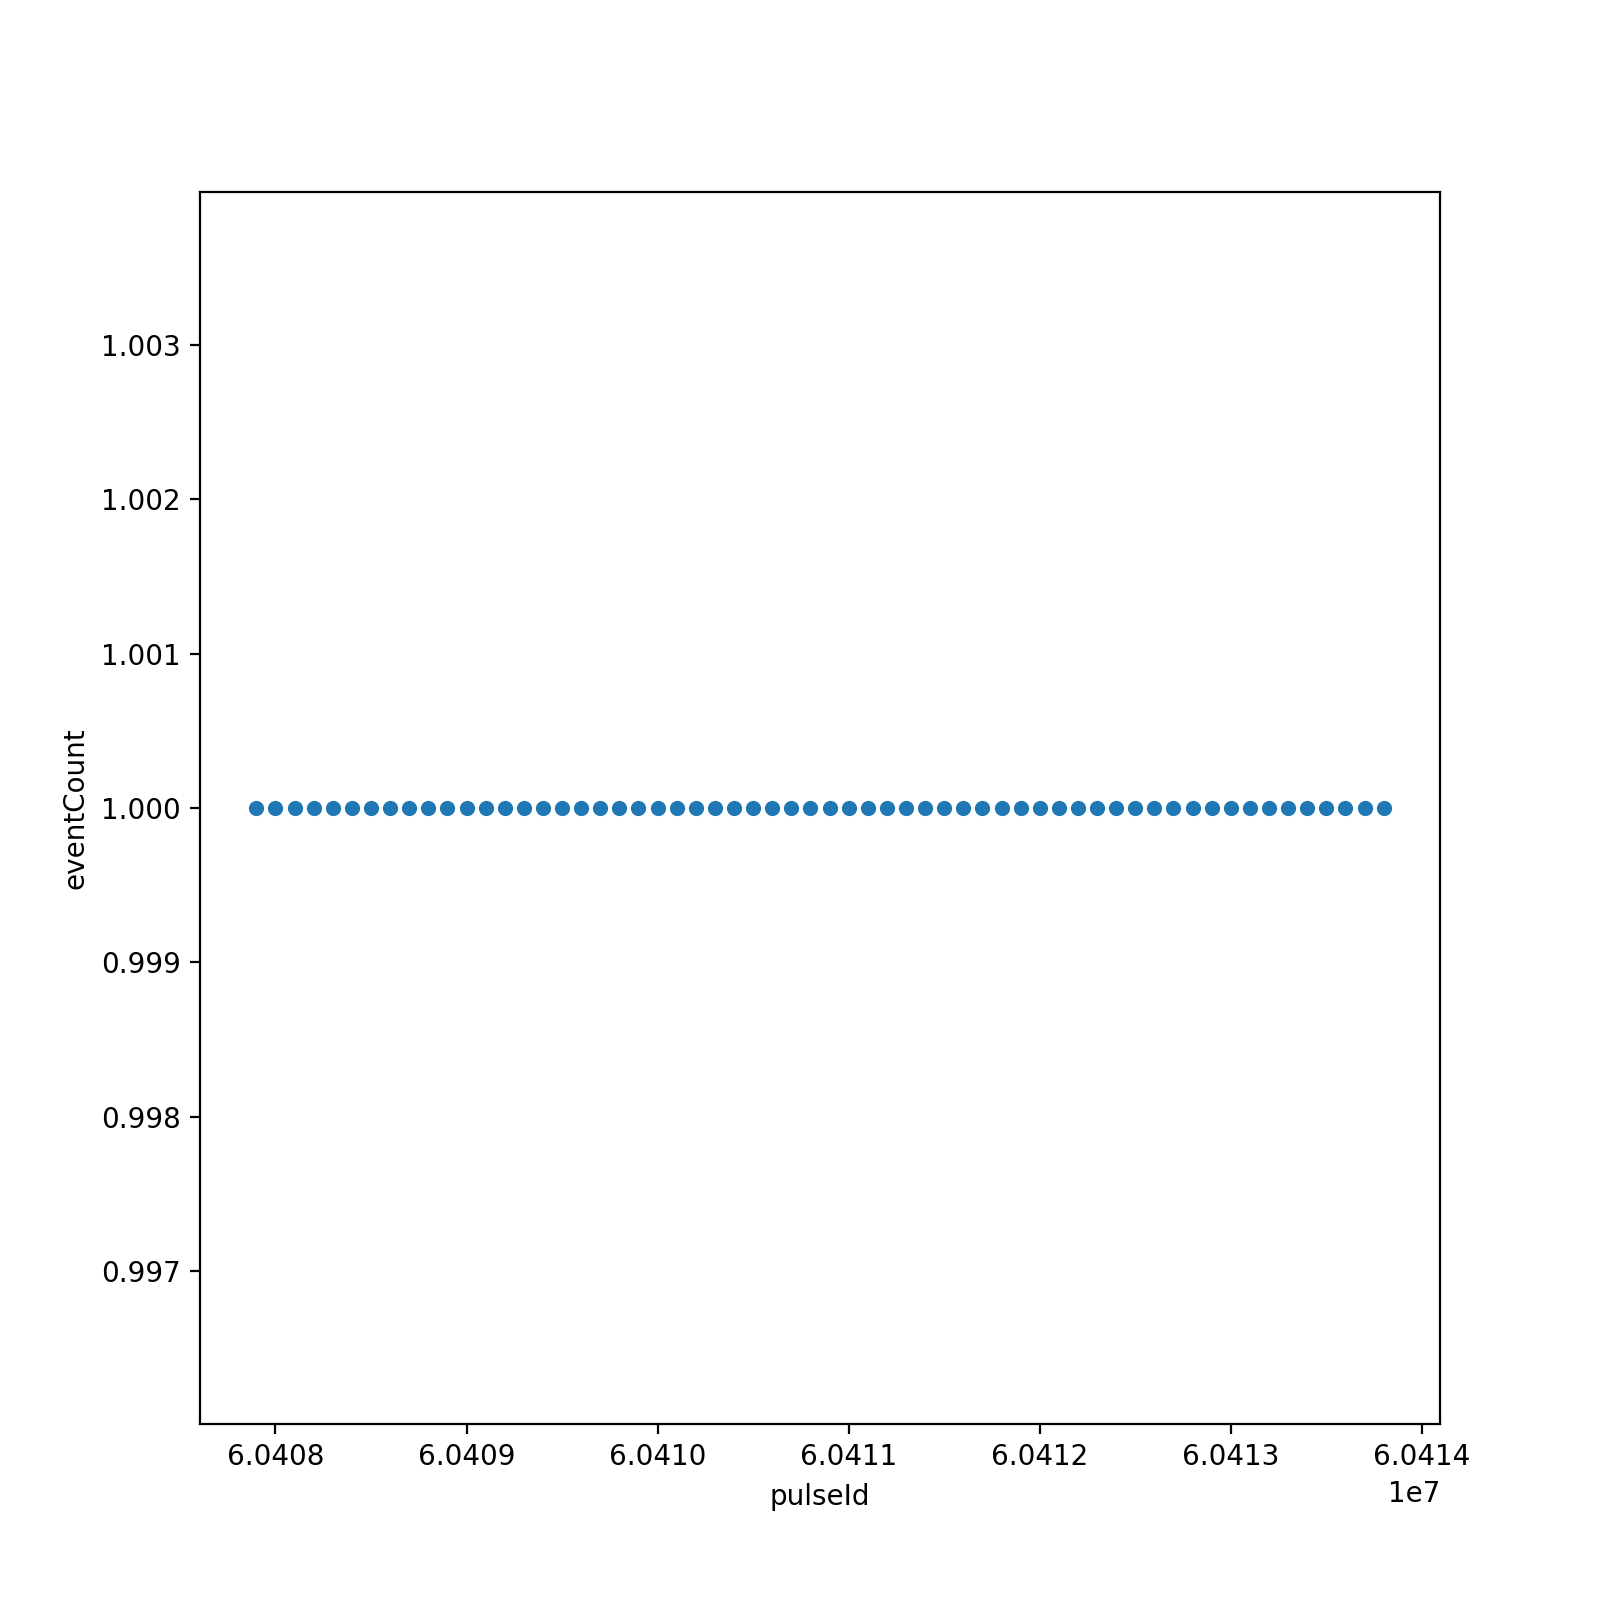

In [7]:
# Correlation Plot
data.plot(kind='scatter', x=data.columns[0], y=data.columns[2], figsize=(8,8), style='.')

<IPython.core.display.Javascript object>


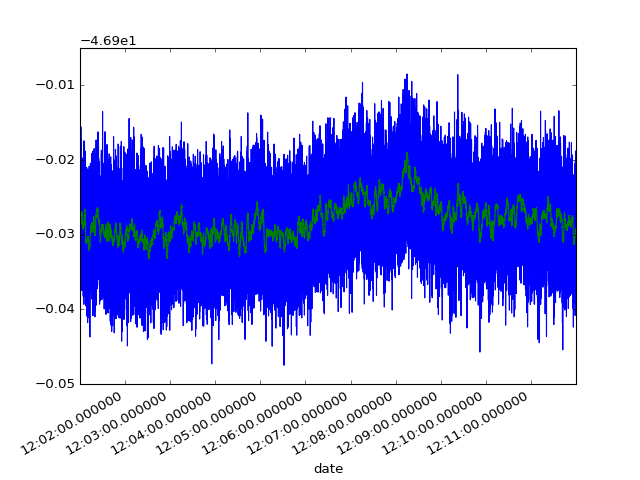

In [37]:
# Plot Rolling-Mean
rolling_mean = data.rolling(window=120).mean()

plt.figure()
data[data.columns[0]].plot()
rolling_mean[data.columns[0]].plot()


In [8]:
# With pandas is easy to compute statistical properties of data. 
# More details can be seen here: http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html

# correlation matrix
data[[data.columns[0], data.columns[2]]].corr()

,pulseId,eventCount
pulseId,1.000,nan
eventCount,nan,nan


In [9]:
data.describe()

,pulseId,globalSeconds,eventCount,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,SINDI01-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG,globalNanoseconds
count,60.000,60.000,60.000,60.000,60.000,60.000,60.000
mean,60410850.000,1469793690.204,1.000,-46.930,314.849,145.914,410850.000
std,1746.425,17.463,0.000,0.005,0.000,0.017,1746.425
min,60407900.000,1469793660.704,1.000,-46.937,314.849,145.885,407900.000
25%,60409375.000,1469793675.455,1.000,-46.933,314.849,145.902,409375.000
50%,60410850.000,1469793690.206,1.000,-46.930,314.849,145.911,410850.000
75%,60412325.000,1469793704.954,1.000,-46.926,314.849,145.925,412325.000
max,60413800.000,1469793719.699,1.000,-46.918,314.849,145.968,413800.000
